In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("Sales.csv", encoding='unicode_escape')   # avoid encoding error using unicoe_escape

In [26]:
data.shape    #NO Of col/row

(11251, 15)

In [29]:
data.head(6)   #Top 6 row

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0,NaN,NaN


In [30]:
data.info()   # information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [31]:
data.isnull().sum()     # Show all null val

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [32]:
data.drop(['Status' , 'unnamed1'] , axis=1 , inplace=True)   # delete 2-col 'status' , 'unnamed1'  and inplace = True mean permnent change

In [33]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [35]:
data.shape

(11251, 13)

In [36]:
data.dropna(inplace=True)    # Delete null values from DataFrame

In [37]:
data.shape   #check

(11239, 13)

In [38]:
data.isnull().sum()  # All null-val = 0

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [39]:
data['Amount'] = data['Amount'].astype('int')   #Change Amount-Col datatype Float to int

In [41]:
data['Amount'].dtypes    #check

dtype('int64')

In [42]:
data.columns      #Show all columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [43]:
data.rename(columns = {'Cust_name' : 'Customer_Name'} , inplace = True)   #Rename col

In [44]:
data.head(3)

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924


In [45]:
data.describe()   # Numerical desciption of dataframe

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [47]:
data[['Age' , 'Orders' , 'Amount']].describe()   #Describe specific col

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Explotary Data Analysis

Gender

In [48]:
data.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

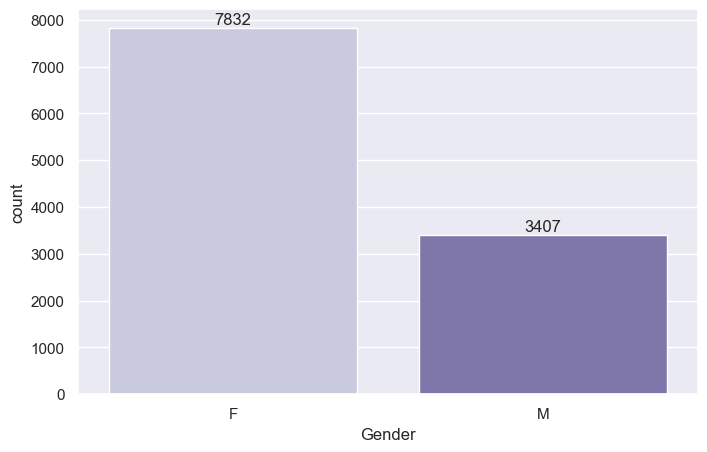

In [184]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 2
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple


ax = sns.countplot(x = 'Gender', hue = 'Gender' , data = data, palette=colors)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

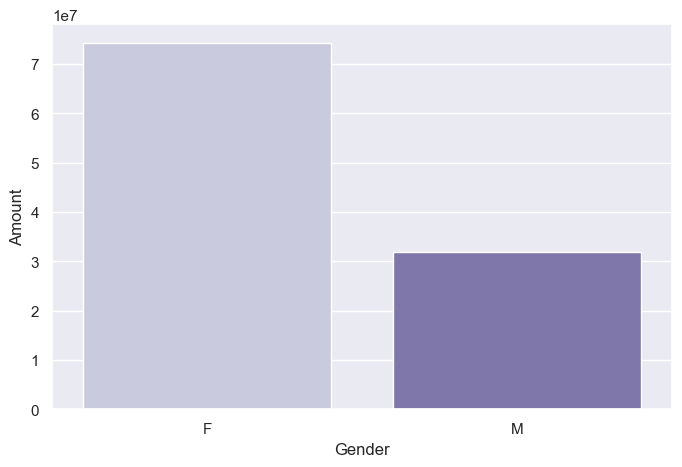

In [185]:
sales_gen = data.groupby(['Gender'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False)
purple_palette = ['#A64D9B', '#6A0D91']
sns.barplot(x = 'Gender', y = 'Amount', hue = 'Gender', data = sales_gen, palette=colors)

#From above graphs we can see most of buyers are females and even purchasing power of females is more than males

AGE

In [78]:
data.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

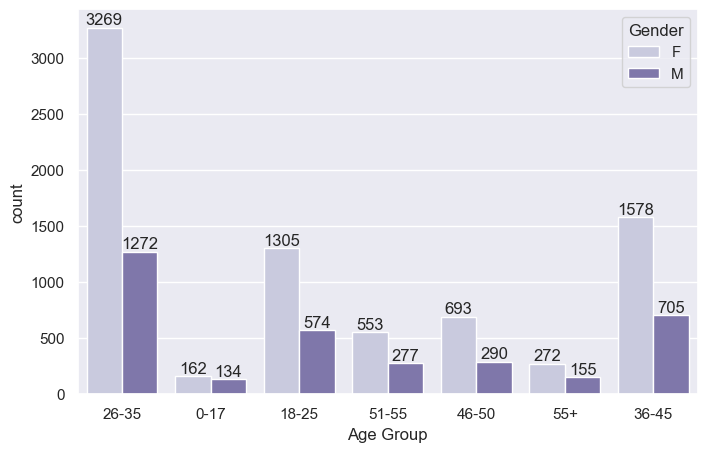

In [186]:
ax = sns.countplot(data = data , x = 'Age Group', hue = 'Gender' , palette = colors)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

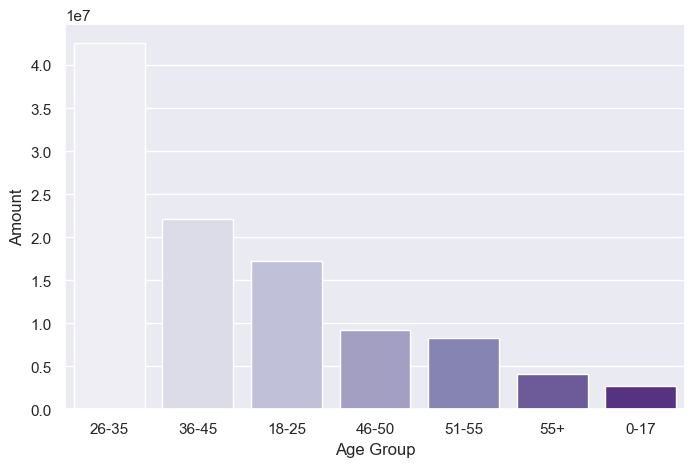

In [188]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 7
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple

sales_age = data.groupby(['Age Group'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', hue = 'Age Group', data = sales_age , palette = colors)

## For the above graphs we can see that most of the buyers are of age group between 26-35yrs are female 

State

In [114]:
data.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

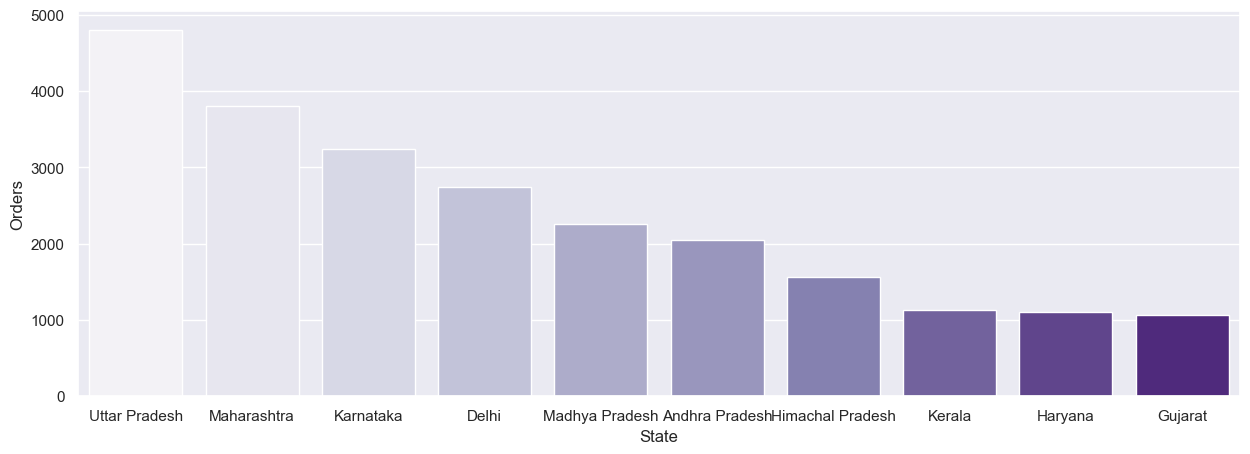

In [176]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 10
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple

sales_state = data.groupby(['State'] , as_index = False)['Orders'].sum().sort_values('Orders' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Orders', hue = 'State', data = sales_state , palette = colors)

<Axes: xlabel='State', ylabel='Amount'>

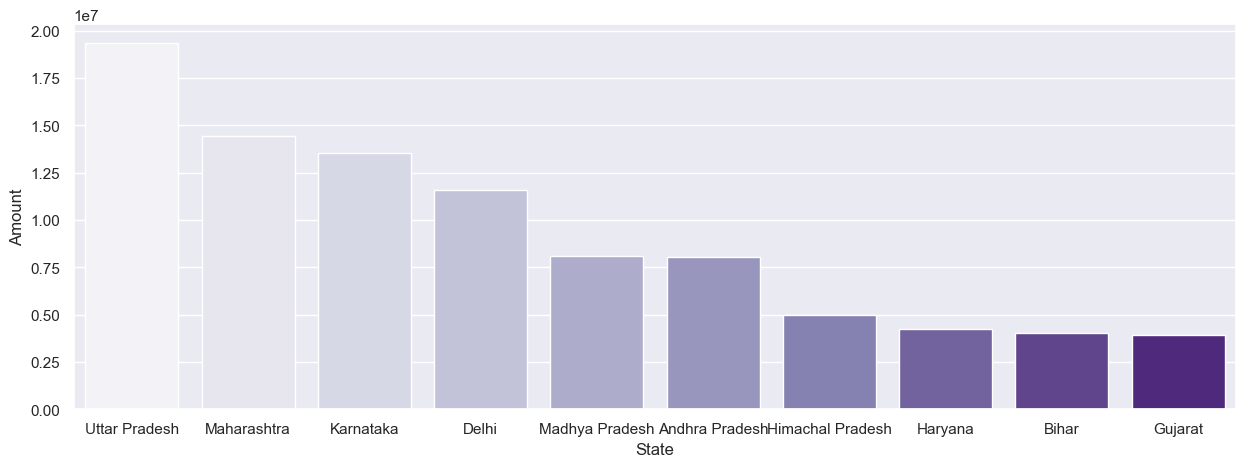

In [175]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 10
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple

sales_state = data.groupby(['State'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', hue = 'State', data = sales_state , palette = colors)

# from above graph we can see that most of the ordrs and total sales / amount are from uttar pardesh mahrashtra and karnatka

Martial Status

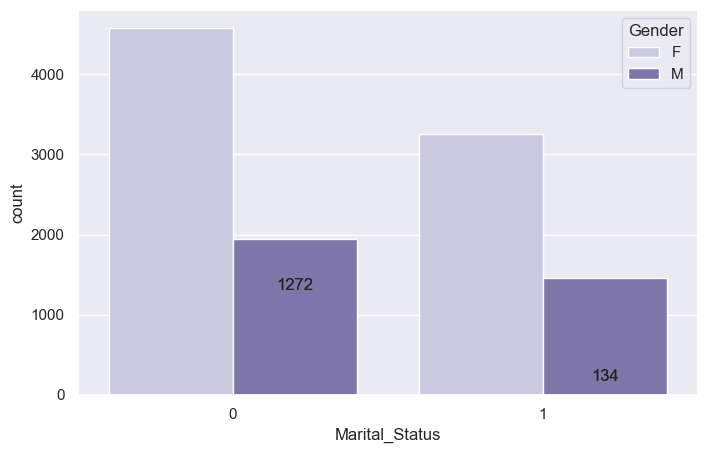

In [191]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 2
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple


ax = sns.countplot(data = data , x = 'Marital_Status', hue = 'Gender', palette = colors)
sns.set(rc={'figure.figsize':(8,5)})
for bar in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

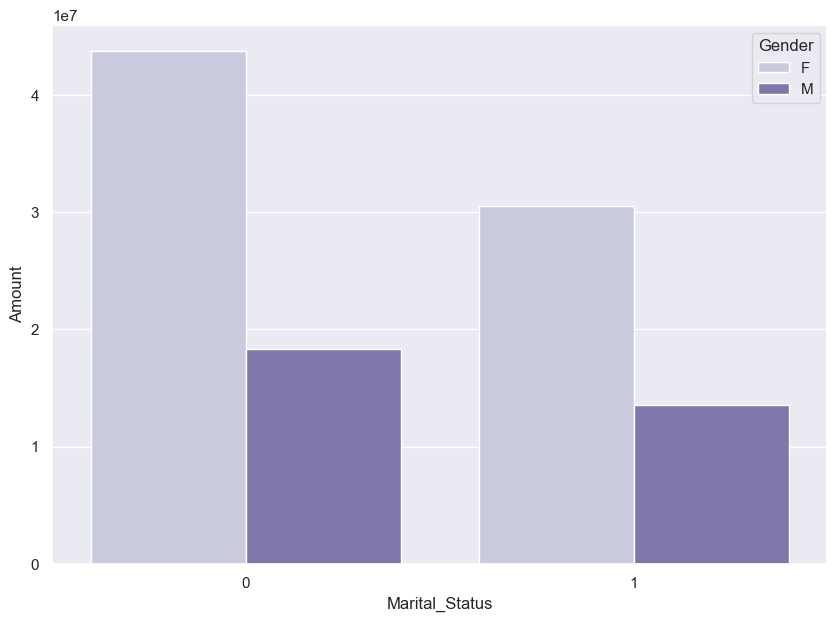

In [192]:
sales_state = data.groupby(['Marital_Status','Gender'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_state , palette = colors)

# Above graph show most of the buyers are married womens

Occupation

In [201]:
data.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

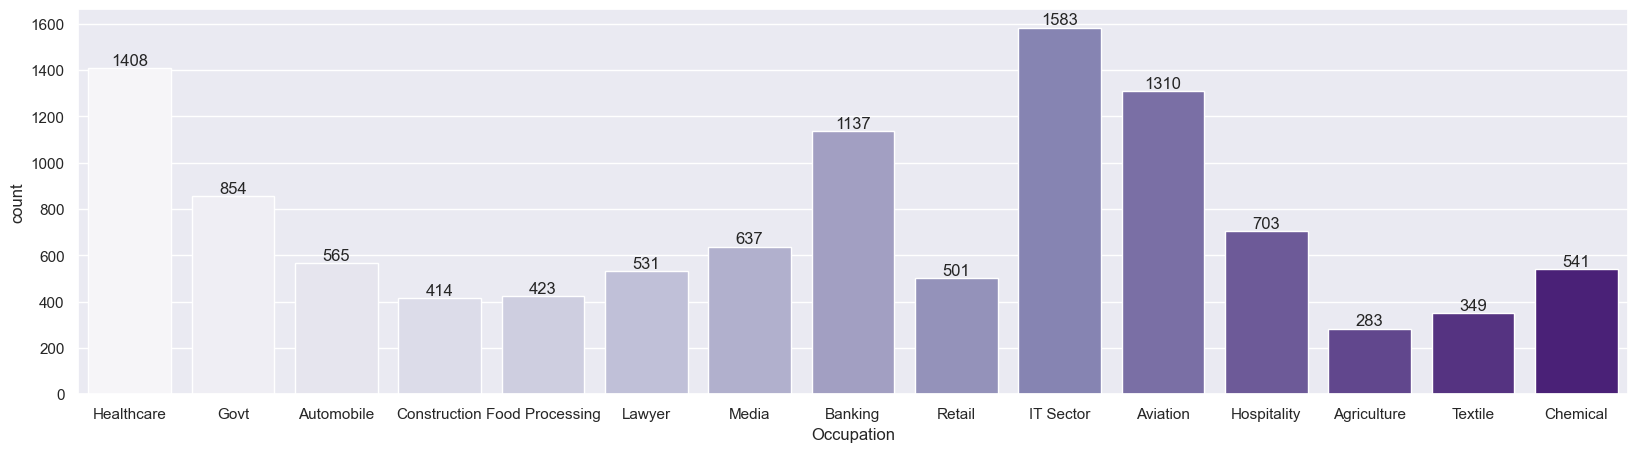

In [202]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple


sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data , x = 'Occupation' , hue = 'Occupation', palette=colors)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

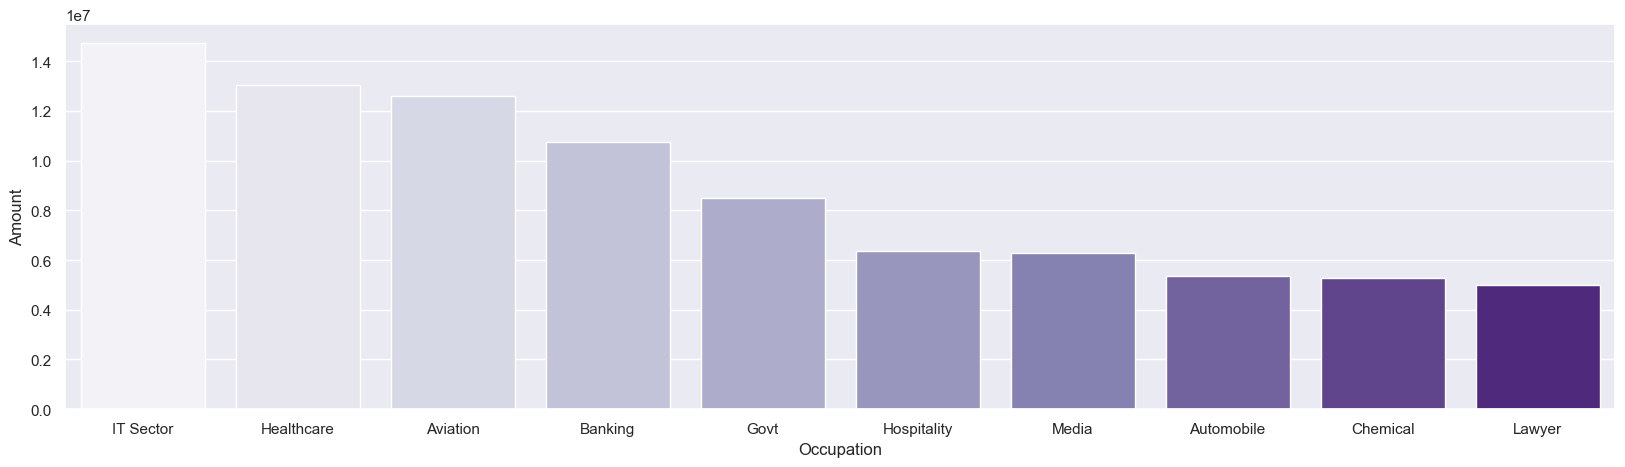

In [203]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 10
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple

sales_state = data.groupby(['Occupation'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', hue = 'Occupation', data = sales_state , palette = colors)

<!-- Above Graph show that the most of tghe buyers are from IT-Sectores,HealthCare,Aviation and banking -->

Product Category

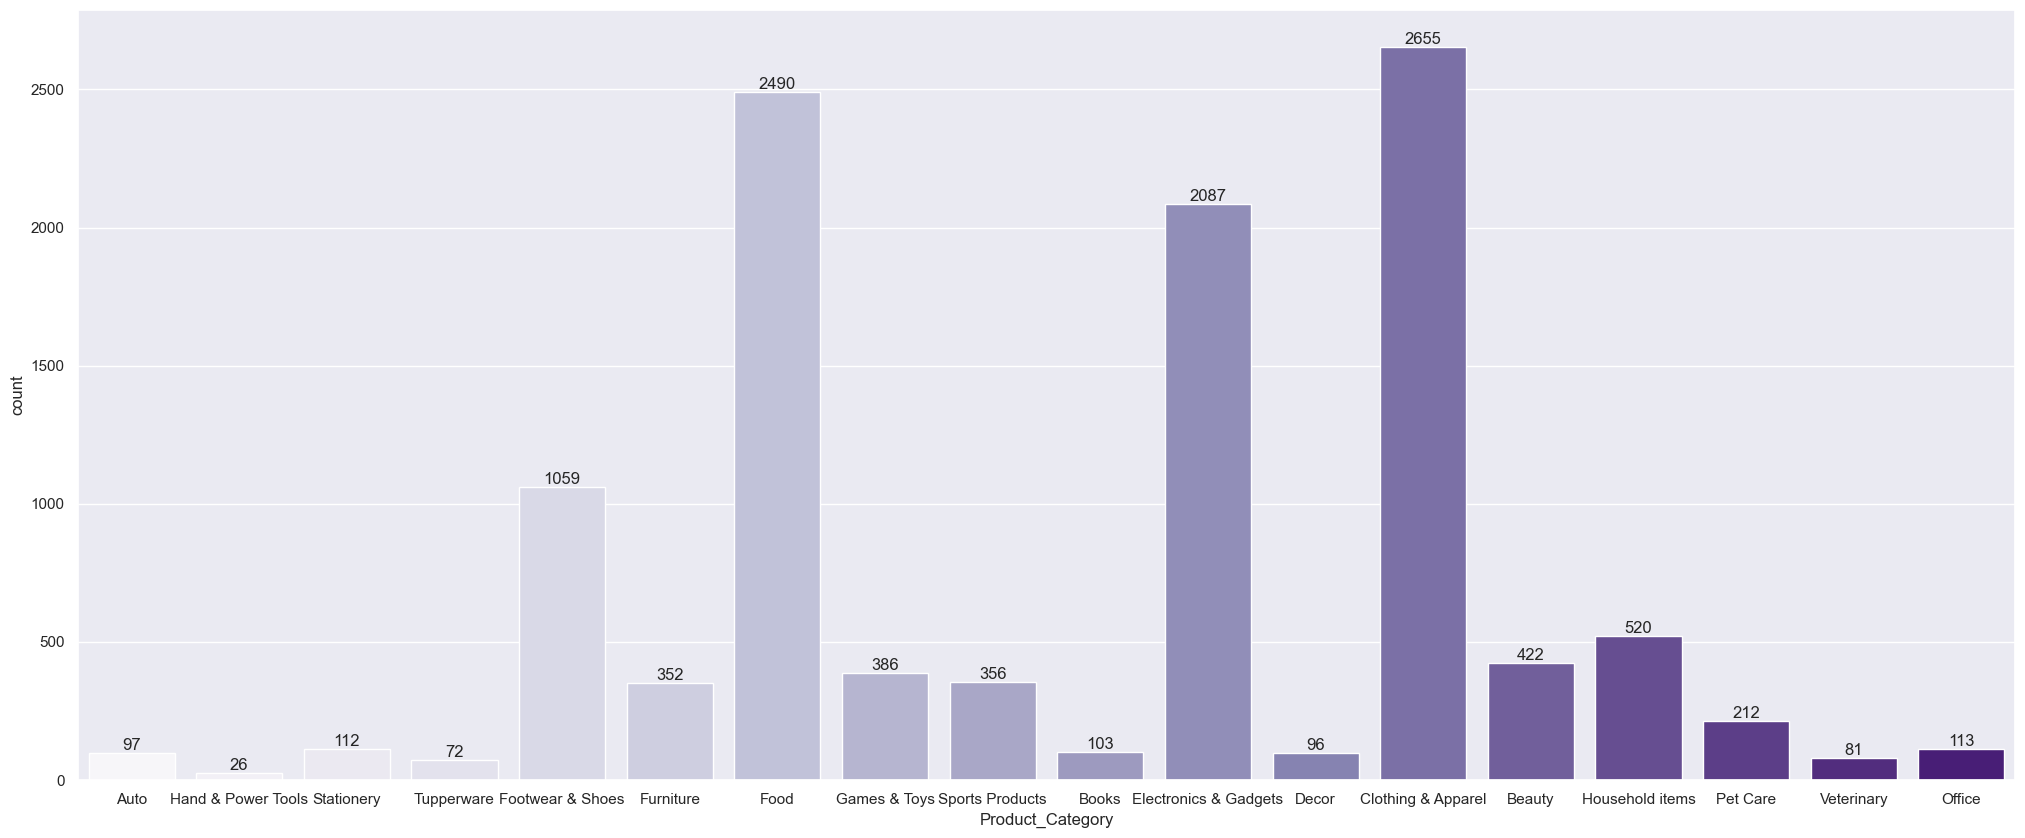

In [205]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 18
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple

sns.set(rc={'figure.figsize':(25,10)})
ax = sns.countplot(data = data , x = 'Product_Category', hue = 'Product_Category', palette=colors)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

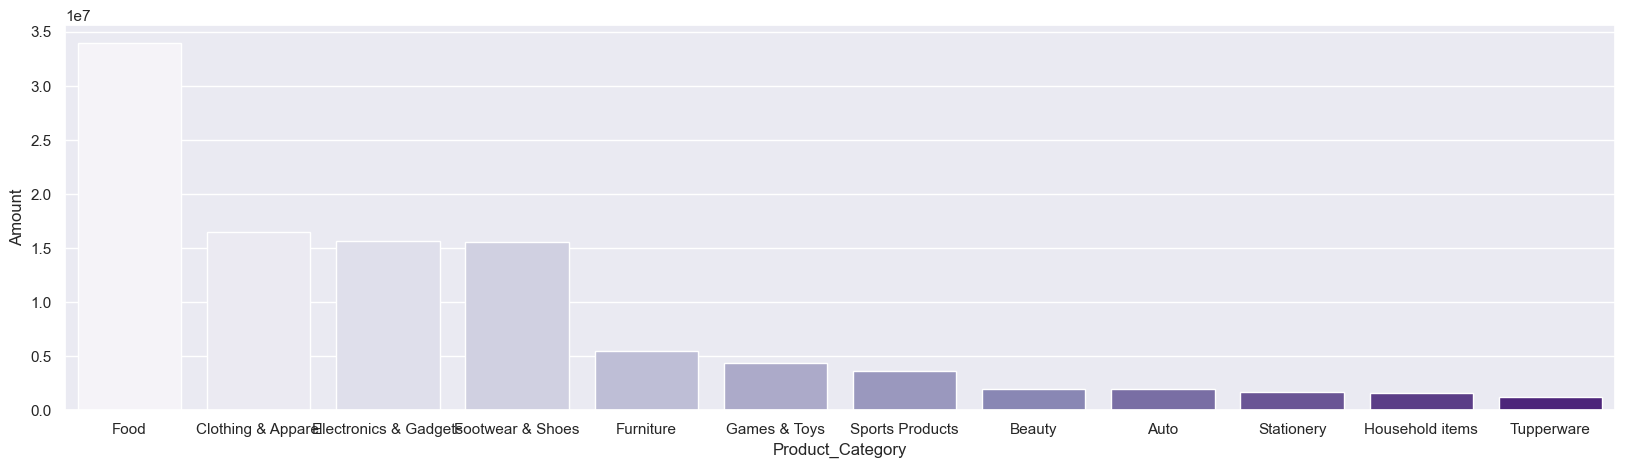

In [211]:
# Generate a color palette with as many colors as there are unique values
unique_occupations = data['Occupation'].unique()
num_colors = len(unique_occupations)
num_colors = 12
colors = sns.color_palette("Purples", num_colors)  # Example: using shades of purple

sales_state = data.groupby(['Product_Category'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False).head(12)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', hue = 'Product_Category', data = sales_state , palette = colors)

# From the above graph we can see that the most of the sold product are from Food, Clothing and Electronics 

<Axes: xlabel='Product_ID'>

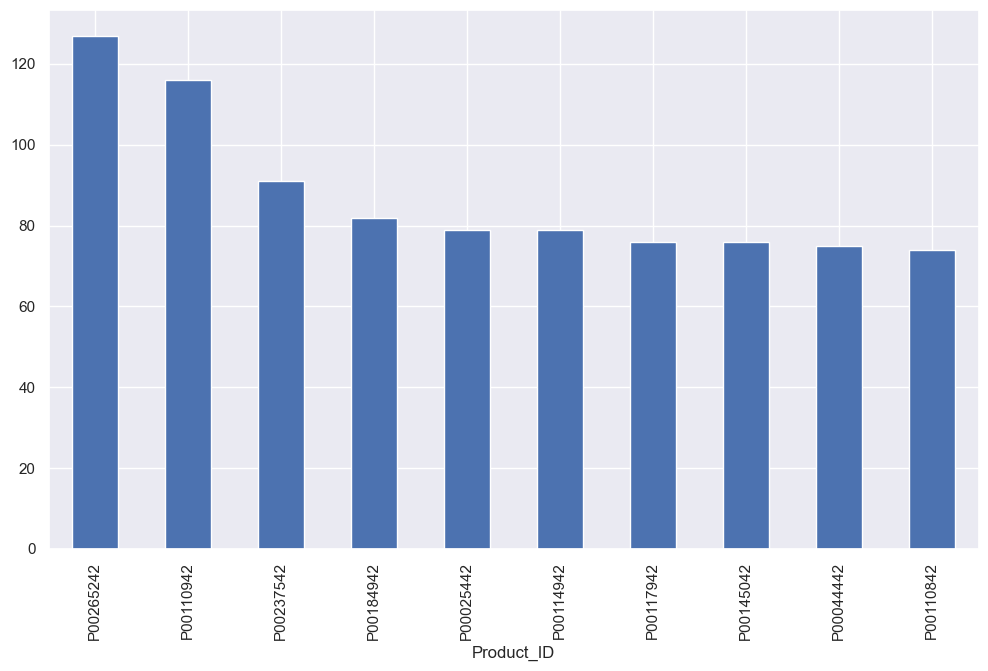

In [222]:
fig1 ,ax1 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

Conclusion

# Married women are are group 26-35 years from UP , Mahrashtra ,Karnatka working in IT, HealthCare and Aviation are more like buy product  from Food, 
# Clothes and Electronics gadgets